In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import math

def sigmoidal(x):
    return 1/(1 + np.exp(-x))

def dsigmoidal(x):
    s = sigmoidal(x)
    return s*(1 - s)

def observation(x):
    #return sigmoidal(.2 -1.*x)
    return np.sign(x+0.5)

def f(params):
    a, b, c, d = params
    y_pred = c + d * sigmoidal(a + b * x)
    loss =  np.square(y_pred - y).sum()
    return loss

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = observation(x) #np.sin(x-.5)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    y_pred = c + d * sigmoidal(a + b * x)
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.dot(dsigmoidal(a + b * x)) * d
    grad_b = grad_y_pred.dot(dsigmoidal(a + b * x) * x) * d
    grad_c = (grad_y_pred).sum()
    grad_d = grad_y_pred.dot(sigmoidal(a + b * x))

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b #* 2e-1
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a}, {b}, {c}, {d}')

99 163.0276699708173
199 145.4052640206394
299 133.5119551542433
399 124.68579195589811
499 117.77546449877762
Result: y = 1.9371156845184314, 3.991318800437681, -1.0642888852988526, 2.1191584095320586


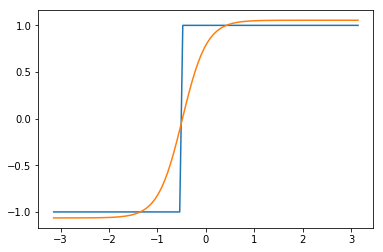

In [3]:
import matplotlib.pyplot as plt

#y = lambda x: a + b*x + c*x**2 + d*x**3
y = lambda x: c + d*sigmoidal(a + b * x)
t = np.linspace(-math.pi, math.pi, 100)
plt.plot(t, observation(t))
plt.plot(t, y(t))
plt.show()